# DS-SF-30 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

import statsmodels.formula.api as smf

Then, read in your dataset:

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [3]:
print df.info()
print df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.5 KB
None
            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000         NaN        NaN         NaN
50%      0.000000         NaN        NaN         NaN
75%      1.000000         NaN        NaN         NaN
max      1.000000  800.000000    4.00000    4.000000


C:\Users\brandon.lam\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


## Questions

> ### Question 1.  How many observations are in our dataset?

In [4]:
df.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: There are 400 observations.

> ### Question 2.  Create a summary table.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.317500,0.466087,0.00,0.0,0.0,1.0,1.0
gre,398.0,588.040201,115.628513,220.00,NaN,NaN,NaN,800.0
gpa,398.0,3.390930,0.380630,2.26,NaN,NaN,NaN,4.0
prestige,399.0,2.486216,0.945333,1.00,NaN,NaN,NaN,4.0


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [6]:
#The distribution of gre scores is much higher than in gpa 
#therefore there is greater variance

Answer:

> ### Question 4.  Drop data points with missing data.

In [7]:
#dfdrop1 = df.dropna (subset = ["gre"])
#dfdrop2 = df.dropna (subset = ["gpa"])
#dfdrop3 = df.dropna (subset = ["prestige"])
#print dfdrop2.info()
#print dfdrop3.info()

df_drop = df.dropna (subset = [["gre","gpa","prestige"]])

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [8]:
print df.gre.unique()
print df_drop.gre.unique()

[ 380.  660.  800.  640.  520.  760.  560.  400.  540.  700.  440.  480.
  780.  360.  500.  600.  680.  620.  580.  460.  740.  300.  720.  340.
  420.   nan  220.]
[ 380.  660.  800.  640.  520.  760.  560.  400.  540.  700.  440.  480.
  780.  360.  500.  600.  680.  620.  580.  460.  740.  300.  720.  340.
  420.  220.]


Answer: Nan no longer appears.

> ### Question 6.  Create boxplots for `gre` and `gpa`.

C:\Users\brandon.lam\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xae23fd0>],
 'caps': [<matplotlib.lines.Line2D at 0xae367d0>,
 'fliers': [<matplotlib.lines.Line2D at 0xda401b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xae36e90>],
 'whiskers': [<matplotlib.lines.Line2D at 0xae360f0>,
  <matplotlib.lines.Line2D at 0xae36490>]}

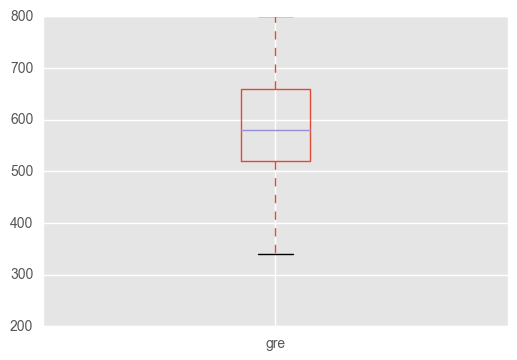

In [9]:
df[ ['gre'] ].boxplot(figsize = (8, 8))

C:\Users\brandon.lam\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xdaf5f90>],
 'caps': [<matplotlib.lines.Line2D at 0xdb04770>,
 'fliers': [<matplotlib.lines.Line2D at 0xdb0f150>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xdb04e30>],
 'whiskers': [<matplotlib.lines.Line2D at 0xdb040b0>,
  <matplotlib.lines.Line2D at 0xdb04430>]}

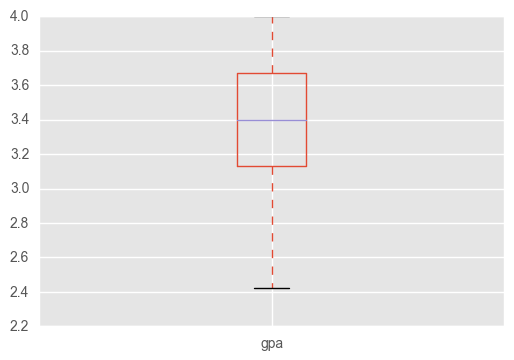

In [10]:
df[ ['gpa'] ].boxplot(figsize = (8, 8))

> ### Question 7.  What do boxplots show?

Answer: The boxplots for GPA and GRE show realatively the same shapes in regards the the box positions and whisker lengths. 

> ### Question 8.  Plot the distribution of each variable.

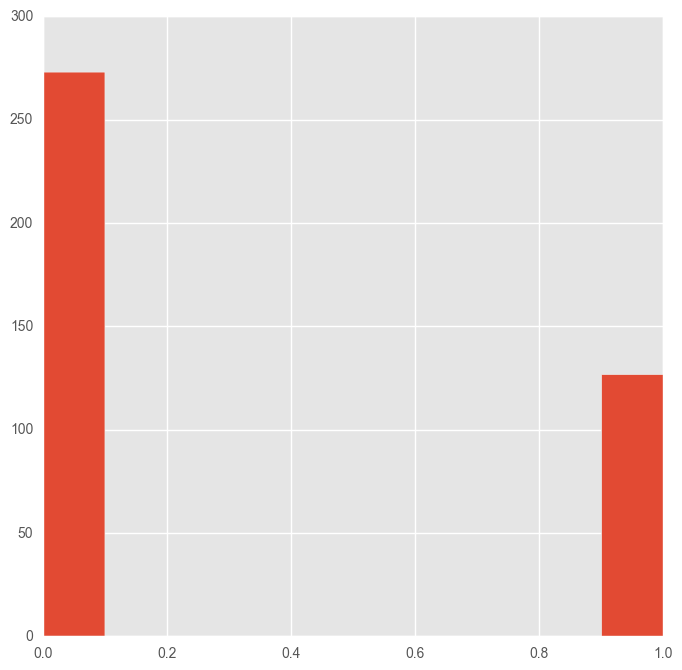

In [11]:
df.admit.hist(figsize = (8, 8))

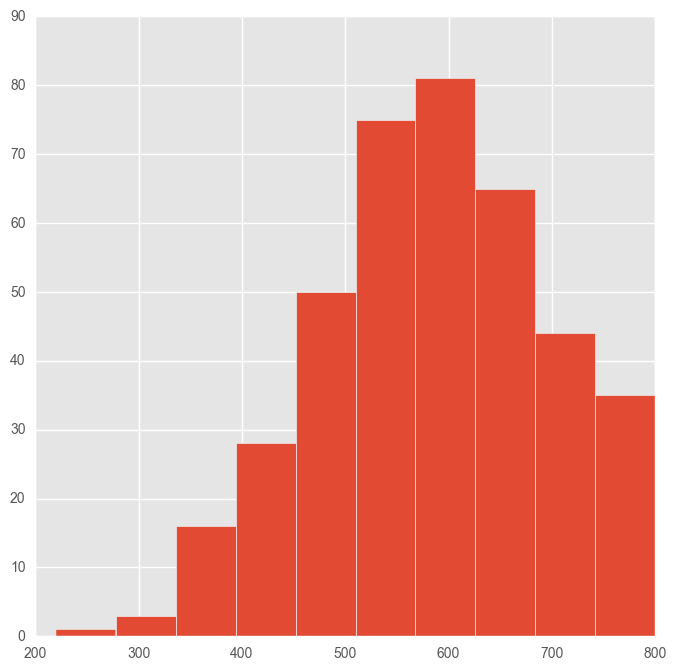

In [86]:
df.gre.hist(figsize = (8, 8))

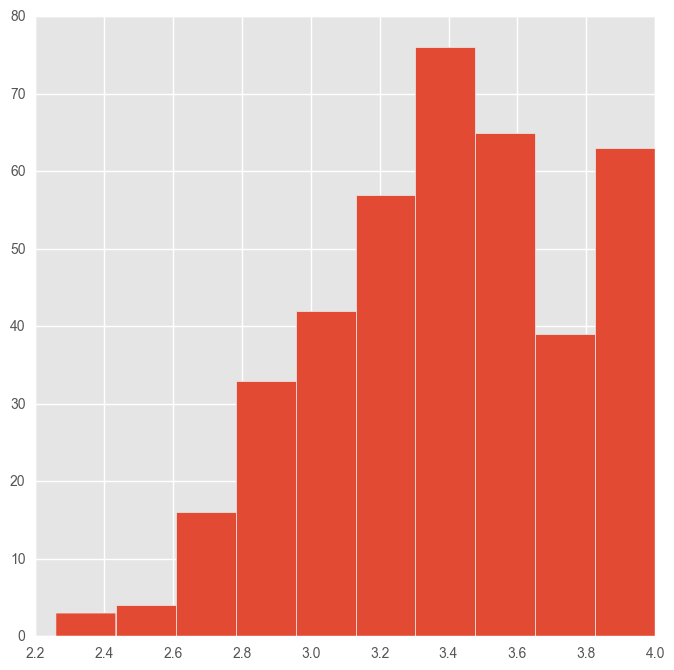

In [12]:
df.gpa.hist(figsize = (8, 8))

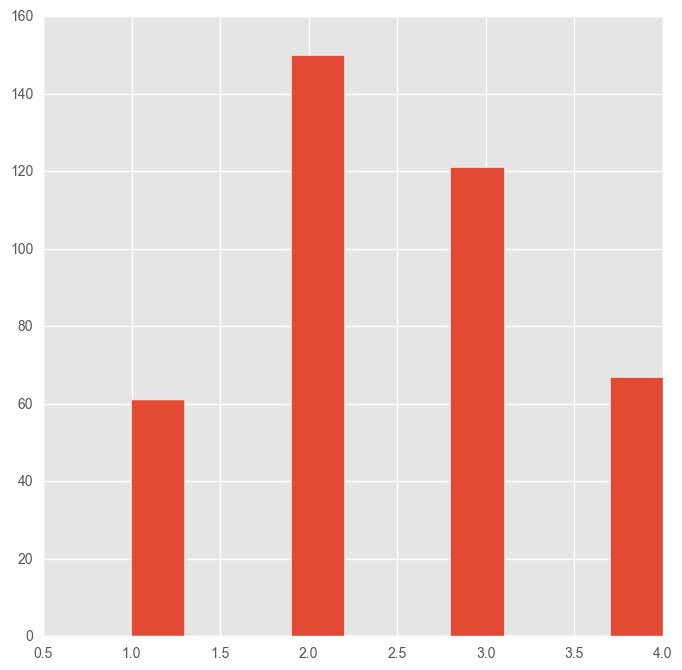

In [88]:
df.prestige.hist(figsize = (8, 8))

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

In [14]:
model = smf.ols(formula = 'gre ~ gpa', data = df).fit()

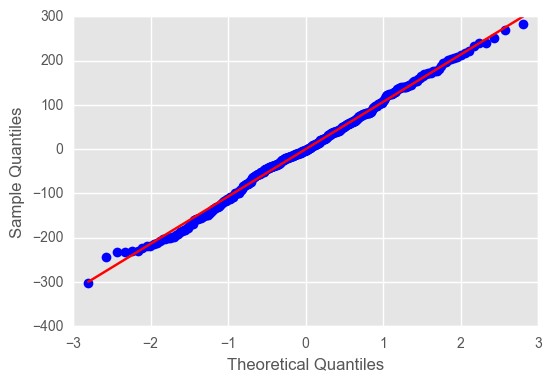

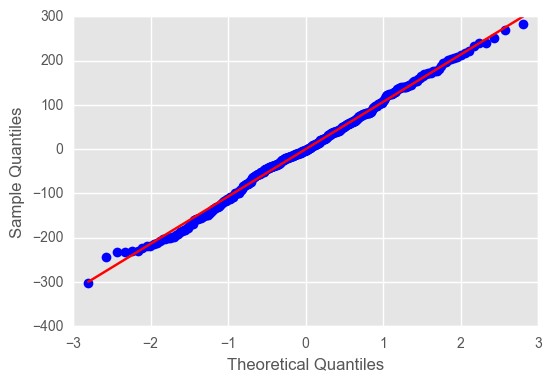

In [15]:
sm.qqplot(model.resid, line = 's')

Answer: Based on the qq.plot, gpa and gre does meet the assumption of normal distribution 

> ### Question 10.  Create a correlation matrix for the dataset

In [16]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: GRE and GPA are positively correlated but are weakly correlated and prestige are negatively correlated across all the other variables

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer:  First, clean the data to remove null values in the dataset. Then plot the distribution of the variable.After, normally disribute the data and identify any correlating data.  

> ### Question 13.  What is your hypothesis?

Answer: GRE and GPA are better predictors of admission than prestige